In [1]:
# Dependencies
import os
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create path to file
path_summary = ('Resources/NHE18_Summary.csv')

# Read csv and convert into df
healthcare_historical_data_extended = pd.read_csv(path_summary, skiprows = 1, 
                                                 skipinitialspace=True)

# Print column heads, need to clean up extra columns
healthcare_historical_data_extended.columns.values

array(['Expenditure Amount', '1960 ', '1961 ', '1962 ', '1963 ', '1964 ',
       '1965 ', '1966 ', '1967 ', '1968 ', '1969 ', '1970 ', '1971 ',
       '1972 ', '1973 ', '1974 ', '1975 ', '1976 ', '1977 ', '1978 ',
       '1979 ', '1980 ', '1981 ', '1982 ', '1983 ', '1984 ', '1985 ',
       '1986 ', '1987 ', '1988 ', '1989 ', '1990 ', '1991 ', '1992 ',
       '1993 ', '1994 ', '1995 ', '1996 ', '1997 ', '1998 ', '1999 ',
       '2000 ', '2001 ', '2002 ', '2003 ', '2004 ', '2005 ', '2006 ',
       '2007 ', '2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ',
       '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68',
       'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72',
       'Unnamed: 73', 'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76',
       'Unnamed: 77', 'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80',
       'Unnamed: 81', 'Unnamed: 82

In [3]:
# Create a df with with years (1968-2018) and rows with info
healthcare_historical_data = healthcare_historical_data_extended.iloc[0:8, 0:60]
healthcare_historical_data = healthcare_historical_data.drop(columns = ['1960 ','1961 ',
                                    '1962 ','1963 ','1964 ', '1965 ','1966 ','1967 '])

# Changing datatype and adding commma so I won't lose data when I convert later
healthcare_historical_data['1968 '] = healthcare_historical_data['1968 '].astype('object')
healthcare_historical_data.at[0, '1968 '] = ',58.4'
healthcare_historical_data.at[1, '1968 '] = ',52.7'
healthcare_historical_data.at[2, '1968 '] = ',49.1'
healthcare_historical_data.at[7, '1968 '] = ',940.7'

# Changing index
healthcare_historical_data = healthcare_historical_data.set_index('Expenditure Amount')

# Switching x and y axis in df 
healthcare_historical_data2 = healthcare_historical_data.T

# Removing commas from numbers in order to change datatypes
healthcare_historical_data2['National Health Expenditures (Amount in Billions)'] = (
    healthcare_historical_data2['National Health Expenditures (Amount in Billions)'].str.replace(',', ''))
healthcare_historical_data2['Health Consumption Expenditures'] = (
    healthcare_historical_data2['Health Consumption Expenditures'].str.replace(',', ''))
healthcare_historical_data2['Personal Health Care'] = (
    healthcare_historical_data2['Personal Health Care'].str.replace(',', ''))
healthcare_historical_data2['Gross Domestic Product2  (Amount in Billions)'] =(
    healthcare_historical_data2['Gross Domestic Product2  (Amount in Billions)'].str.replace(',', ''))

# Change datatype to float/int
healthcare_historical_data3 = healthcare_historical_data2.astype('float')
healthcare_historical_data3 = healthcare_historical_data3.reset_index(drop = False)
healthcare_historical_data3['index'] = healthcare_historical_data3['index'].astype('int')
healthcare_historical_data_final = healthcare_historical_data3.set_index('index')

# Reformating df
pd.options.display.float_format = '{:,.1f}'.format

# Save as csv
healthcare_historical_data_final.to_csv('Cleaned_Data/historical_healthcare_data_summary.csv', 
                                        index = True, header = True)

healthcare_historical_data_final.head()

Expenditure Amount,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions)
index,,,,,,,,
1968,58.4,52.7,49.1,2.6,1.0,5.7,205.6,940.7
1969,65.9,59.1,55.5,2.4,1.2,6.8,207.6,"1,017.6"
1970,74.6,67.0,63.1,2.6,1.4,7.5,210.2,"1,073.3"
1971,82.7,74.3,69.4,3.2,1.7,8.4,212.8,"1,164.9"
1972,92.7,83.3,77.2,4.3,1.9,9.3,214.9,"1,279.1"


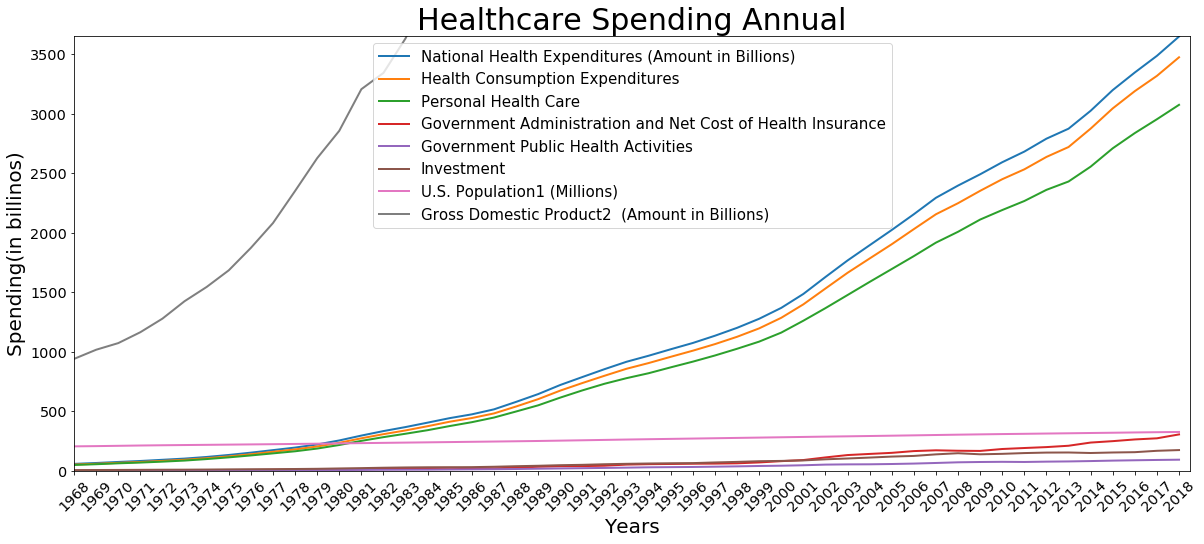

In [4]:
# Toying with graphs - need to limit info to see trends

# Creating variables for my limits
low = 0
high = healthcare_historical_data_final['National Health Expenditures (Amount in Billions)'].max() +5
xlow = healthcare_historical_data_final.index.min()
xhigh = healthcare_historical_data_final.index.max()+0.5
x_axis = np.arange (xlow, xhigh, 1)

# Creating and customizing a line graph
plt.figure(figsize = (20, 8))
plt.plot(healthcare_historical_data_final, linewidth = 2)
plt.legend(labels = healthcare_historical_data_final, loc="best",  
           prop={'size': 15}, fancybox = True)
plt.title('Healthcare Spending Annual', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Spending(in billinos)', fontdict = {'fontsize' : 20})
plt.xticks(x_axis, fontsize = 'x-large', rotation = 45)
plt.yticks(fontsize = 'x-large')
plt.xlim (xlow, xhigh)
plt.ylim (low, high)
plt.show()

In [5]:
# Create df with relavant information
healthcare_percent_change_data = healthcare_historical_data_extended.iloc[9:16, 0:60]
healthcare_percent_change_data = healthcare_percent_change_data.drop(columns = ['1960 ',
                            '1961 ','1962 ','1963 ','1964 ', '1965 ','1966 ','1967 '])

# Changing index
healthcare_percent_change_data = healthcare_percent_change_data.set_index(
                                                        'Expenditure Amount')

# Switching x and y axis in df
healthcare_percent_change_data2 = healthcare_percent_change_data.T

# Pull out index and change datatypes to float/int
healthcare_percent_change_data3 = healthcare_percent_change_data2.astype('float')
healthcare_percent_change_data_final = healthcare_percent_change_data3.reset_index(drop = False)
healthcare_percent_change_data_final['index'] = healthcare_percent_change_data_final['index'].astype('int')
healthcare_percent_change_data_final = healthcare_percent_change_data_final.set_index('index')

# Reformating df
pd.options.display.float_format = '{:,.1f}'.format

# Save as csv
healthcare_percent_change_data_final.to_csv(
    'Cleaned_Data/historical_healthcare_data_summary(percentchange).csv', 
    index = True, header = True)

healthcare_percent_change_data_final.head()

Expenditure Amount,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2
index,,,,,,,
1968,13.3,12.9,21.1,12.6,12.8,0.9,9.4
1969,12.2,13.0,-6.9,21.1,19.5,1.0,8.2
1970,13.5,13.6,9.1,15.5,10.1,1.2,5.5
1971,10.9,10.1,22.6,23.6,11.6,1.2,8.5
1972,12.1,11.1,34.3,10.7,11.0,1.0,9.8


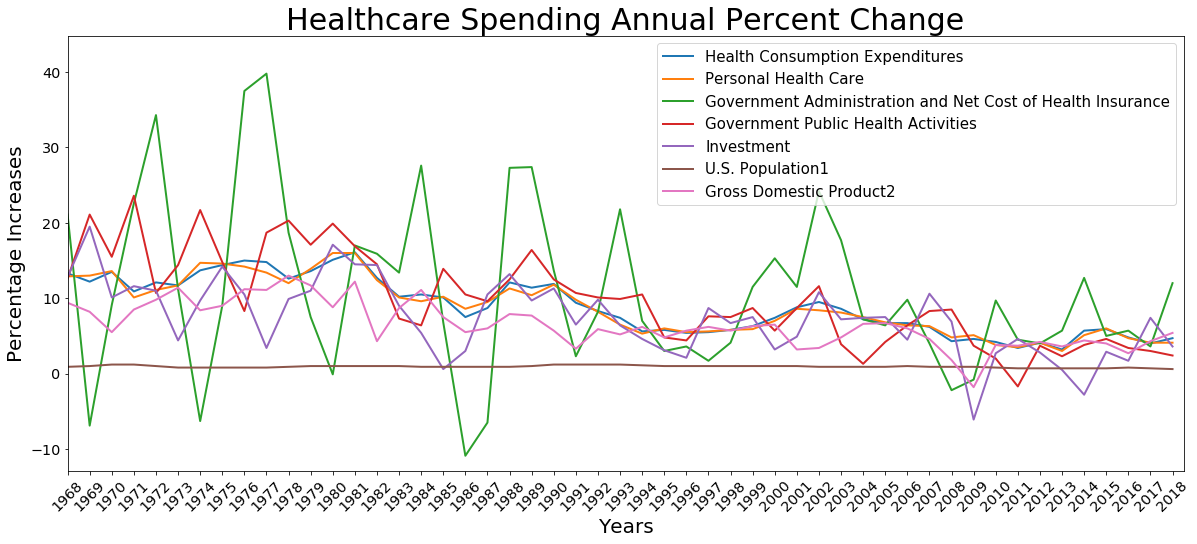

In [6]:
# Toying with graphs

# Creating variables for my limits
low = healthcare_percent_change_data_final['Government Administration and Net Cost of Health Insurance'].min() -2
high = healthcare_percent_change_data_final['Government Administration and Net Cost of Health Insurance'].max() +5
xlow = healthcare_percent_change_data_final.index.min()
xhigh = healthcare_percent_change_data_final.index.max()+0.5
x_axis = np.arange (xlow, xhigh, 1)

# Creating and customizing a line graph
plt.figure(figsize = (20, 8))
plt.plot(healthcare_percent_change_data_final, linewidth = 2)
plt.legend(labels = healthcare_percent_change_data_final, loc="best",  
           prop={'size': 15}, fancybox = True)
plt.title('Healthcare Spending Annual Percent Change', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Percentage Increases', fontdict = {'fontsize' : 20})
plt.xticks(x_axis, fontsize = 'x-large', rotation = 45)
plt.yticks(fontsize = 'x-large')
plt.xlim (xlow, xhigh)
plt.ylim (low, high)
plt.show()

In [9]:
percent_change  = healthcare_percent_change_data_final.iloc[:,1:7]
percent_change.head()

Expenditure Amount,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2
index,,,,,,
1968,12.9,21.1,12.6,12.8,0.9,9.4
1969,13.0,-6.9,21.1,19.5,1.0,8.2
1970,13.6,9.1,15.5,10.1,1.2,5.5
1971,10.1,22.6,23.6,11.6,1.2,8.5
1972,11.1,34.3,10.7,11.0,1.0,9.8


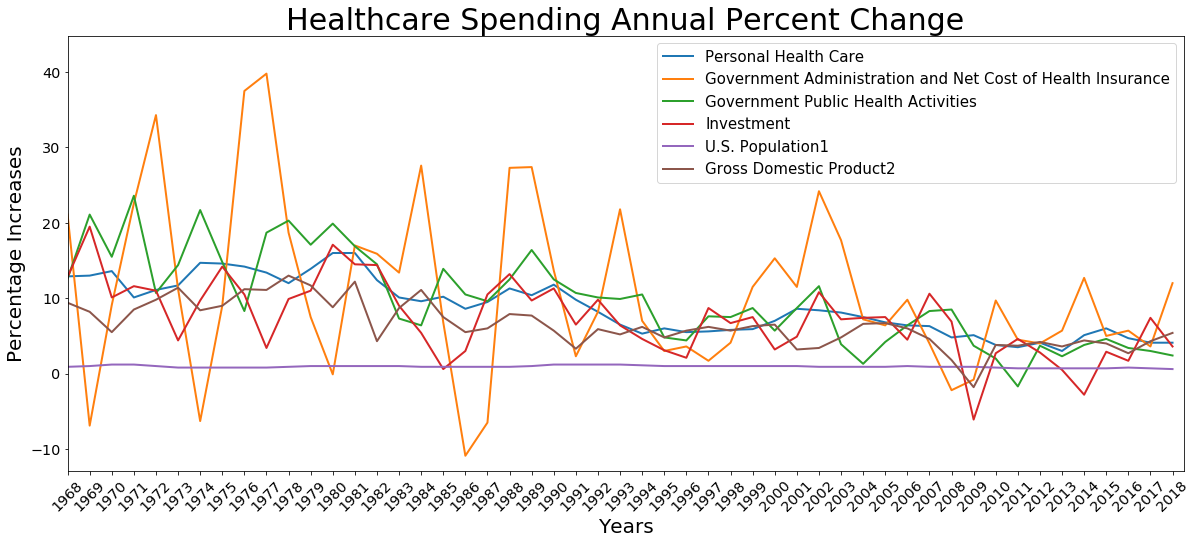

In [10]:
# Toying with graphs

# Creating variables for my limits
low = percent_change['Government Administration and Net Cost of Health Insurance'].min() -2
high = percent_change['Government Administration and Net Cost of Health Insurance'].max() +5
xlow = percent_change.index.min()
xhigh = percent_change.index.max()+0.5
x_axis = np.arange (xlow, xhigh, 1)

# Creating and customizing a line graph
plt.figure(figsize = (20, 8))
plt.plot(percent_change, linewidth = 2)
plt.legend(labels = percent_change, loc="best",  
           prop={'size': 15}, fancybox = True)
plt.title('Healthcare Spending Annual Percent Change', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Percentage Increases', fontdict = {'fontsize' : 20})
plt.xticks(x_axis, fontsize = 'x-large', rotation = 45)
plt.yticks(fontsize = 'x-large')
plt.xlim (xlow, xhigh)
plt.ylim (low, high)
plt.show()